In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("../data/data.csv")

In [3]:
df = df.drop(["Id"],axis = 1)
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


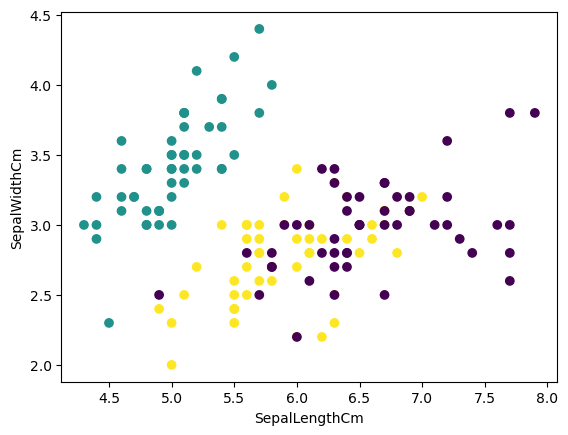

In [4]:
flower_map = {'Iris-virginica':0, 'Iris-setosa':1, 'Iris-versicolor':2}

labels = [flower_map[df["Species"][i]] for i in range(df.shape[0])]

plt.figure()
plt.scatter(df['SepalLengthCm'],df["SepalWidthCm"], c = labels)
plt.xlabel('SepalLengthCm')
plt.ylabel("SepalWidthCm")
plt.show()

In [5]:
print(df.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [6]:
#okay, so first things first, let's scale the data...
#this is simply good practice for lot's of these examples
#In some cases it is unnecessary

for row in df:
    if row != "Species":
        df[row] = (df[row] - df[row].min())/(df[row].max()-df[row].min())



In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [8]:
from sklearn.model_selection import train_test_split



In [9]:
df = df.drop(["Species"],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(df, labels, test_size = .2)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [11]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
predictions_train = DT.predict(X_train)
predictions_test = DT.predict(X_test)
print("Train Accuracy:")
print(accuracy_score(y_train,predictions_train))
print("Test Accuracy:")
print(accuracy_score(y_test,predictions_test))
#pretty good results!

Train Accuracy:
1.0
Test Accuracy:
1.0


/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
#Does a random forest do better
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
predictions_train = RF.predict(X_train)
predictions_test = RF.predict(X_test)
print("Train Accuracy:")
print(accuracy_score(y_train,predictions_train))
print("Test Accuracy:")
print(accuracy_score(y_test,predictions_test))
#pretty good results!

Train Accuracy:
1.0
Test Accuracy:
1.0


/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [14]:
#okay, so now can we build a small neural network with pytorch and see how that compares. 
#also worth plotting the decision boundary
import torch



In [15]:
X_train = torch.from_numpy(X_train.values).type(torch.float)
X_test = torch.from_numpy(X_test.values).type(torch.float)
y_train = torch.Tensor(y_train).type(torch.LongTensor)
y_test = torch.Tensor(y_test).type(torch.LongTensor)

In [16]:
from torch import nn

In [17]:
class simpleNN(nn.Module):
    
    def __init__(self, in_shape = 4, out_shape = 3):
        super().__init__()
        self.layer1 = nn.Linear(in_shape,10)
        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,3)
        self.ReLU = nn.ReLU()
#                                nn.ReLU(), 
#                                nn.Linear(5,5), 
#                                 nn.ReLU(),
#                                nn.Linear(5, out_shape))
    
    def forward(self, x):
        
        tmp = self.layer1(x)
        
        return self.layer3(tmp + self.ReLU(self.layer2(self.ReLU(tmp))))
        
        
        
#         return self.layer3(self.ReLU(self.layer2(self.ReLU())))
    
NNmodel = simpleNN(4,3)

# NNmodel = nn.Sequential(nn.Linear(4,5), 
#                                nn.ReLU(), 
#                                nn.Linear(5,5), 
#                                 nn.ReLU(),
#                                nn.Linear(5, 3))

In [18]:
NNmodel

simpleNN(
  (layer1): Linear(in_features=4, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=3, bias=True)
  (ReLU): ReLU()
)

In [19]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.CrossEntropyLoss() # BCEWithLogitsLoss = sigmoid built-in, so you don't have to convert

# Create an optimizer
optimizer = torch.optim.SGD(params=NNmodel.parameters(), lr=0.01)
# X_test = X_test.type(torch.float32)
# X_train = X_train.type(torch.float32)
# y_test = y_test.type(torch.LongTensor)
# y_train = y_train.type(torch.float32)

In [20]:

# X_test.requires_grad = True
# X_train.requires_grad = True
# # y_test.requires_grad = True
# y_train.requires_grad = True
tmp = torch.softmax(NNmodel(X_test)[:5],dim=1).argmax(dim=1).detach().numpy()

accuracy_score(tmp,y_test[:5].detach().numpy())

#note that the output of the model is logits or log odds
# tmp


0.2

In [21]:
epochs = 20000

for epoch in range(epochs):
    ### Training
    NNmodel.train()
    # 1. Forward pass
    y_logits = NNmodel(X_train)
    
    
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1).type(torch.float32)
   
    loss = loss_fn(y_logits,y_train)

    acc = accuracy_score(y_pred.numpy(), y_train.detach().numpy())
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()
    
    
    # 5. Optimizer step
    optimizer.step()
    

    ### Testing
    if epoch % 100 == 0:
        NNmodel.eval()
        with torch.inference_mode():
          # 1. Forward pass
          test_logits = NNmodel(X_test)
          test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1).type(torch.float32)
          # 2. Calculate test loss and accuracy
          test_loss = loss_fn(test_logits, y_test)
          test_acc = accuracy_score(test_pred.numpy(),
                                 y_test.detach().numpy())

        # Print out what's happening
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

    


Epoch: 0 | Loss: 1.17729, Acc: 0.33% | Test Loss: 1.18129, Test Acc: 0.33%
Epoch: 100 | Loss: 1.05686, Acc: 0.33% | Test Loss: 1.05471, Test Acc: 0.33%
Epoch: 200 | Loss: 1.01000, Acc: 0.65% | Test Loss: 1.00678, Test Acc: 0.63%
Epoch: 300 | Loss: 0.95316, Acc: 0.69% | Test Loss: 0.95130, Test Acc: 0.70%
Epoch: 400 | Loss: 0.87517, Acc: 0.71% | Test Loss: 0.87636, Test Acc: 0.70%
Epoch: 500 | Loss: 0.77657, Acc: 0.72% | Test Loss: 0.78247, Test Acc: 0.70%
Epoch: 600 | Loss: 0.67254, Acc: 0.78% | Test Loss: 0.68430, Test Acc: 0.70%
Epoch: 700 | Loss: 0.58203, Acc: 0.83% | Test Loss: 0.59996, Test Acc: 0.73%
Epoch: 800 | Loss: 0.51383, Acc: 0.86% | Test Loss: 0.53787, Test Acc: 0.83%
Epoch: 900 | Loss: 0.46520, Acc: 0.88% | Test Loss: 0.49507, Test Acc: 0.83%
Epoch: 1000 | Loss: 0.42734, Acc: 0.90% | Test Loss: 0.46241, Test Acc: 0.87%
Epoch: 1100 | Loss: 0.39597, Acc: 0.93% | Test Loss: 0.43516, Test Acc: 0.90%
Epoch: 1200 | Loss: 0.36732, Acc: 0.93% | Test Loss: 0.41017, Test Acc: 0.90

Epoch: 11200 | Loss: 0.05480, Acc: 0.98% | Test Loss: 0.03467, Test Acc: 1.00%
Epoch: 11300 | Loss: 0.05469, Acc: 0.98% | Test Loss: 0.03439, Test Acc: 1.00%
Epoch: 11400 | Loss: 0.05459, Acc: 0.98% | Test Loss: 0.03409, Test Acc: 1.00%
Epoch: 11500 | Loss: 0.05449, Acc: 0.98% | Test Loss: 0.03381, Test Acc: 1.00%
Epoch: 11600 | Loss: 0.05439, Acc: 0.98% | Test Loss: 0.03353, Test Acc: 1.00%
Epoch: 11700 | Loss: 0.05430, Acc: 0.98% | Test Loss: 0.03325, Test Acc: 1.00%
Epoch: 11800 | Loss: 0.05420, Acc: 0.98% | Test Loss: 0.03297, Test Acc: 1.00%
Epoch: 11900 | Loss: 0.05411, Acc: 0.98% | Test Loss: 0.03270, Test Acc: 1.00%
Epoch: 12000 | Loss: 0.05402, Acc: 0.98% | Test Loss: 0.03244, Test Acc: 1.00%
Epoch: 12100 | Loss: 0.05393, Acc: 0.98% | Test Loss: 0.03218, Test Acc: 1.00%
Epoch: 12200 | Loss: 0.05385, Acc: 0.98% | Test Loss: 0.03192, Test Acc: 1.00%
Epoch: 12300 | Loss: 0.05376, Acc: 0.98% | Test Loss: 0.03166, Test Acc: 1.00%
Epoch: 12400 | Loss: 0.05368, Acc: 0.98% | Test Loss

In [360]:
#so it appears that our neural network is slightly better than the other two models in terms of 
#out of sample performance. Not bad.